In [108]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import os

# Edge Detection 및 확대
def crop_and_zoom_edges(image, padding=50, min_contour_area=10):
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Canny Edge Detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Contours 찾기
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 유효한 contour 필터링
    valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]
    
    # 모든 Contour를 포함하는 Bounding Box 계산
    if not valid_contours:
        print("No valid contours found.")
        return image  # 유효한 contour가 없으면 원본 이미지를 반환

    x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
    for cnt in valid_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)
    
    # 패딩 추가 (이미지 경계 고려)
    x_min = max(0, x_min - padding)
    y_min = max(0, y_min - padding)
    x_max = min(image.shape[1], x_max + padding)
    y_max = min(image.shape[0], y_max + padding)
    
    # Crop and Zoom
    cropped = image[y_min:y_max, x_min:x_max]
    zoomed = cv2.resize(cropped, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)
    return zoomed



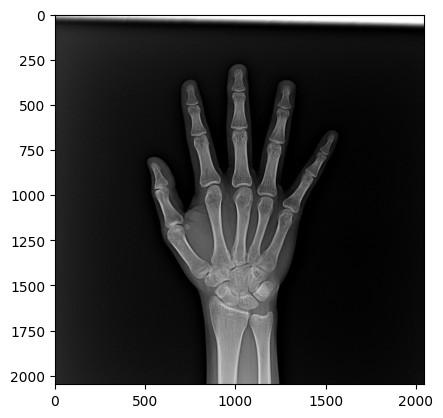

In [109]:
IMAGE_ROOT = "../test_data/"
image_path = os.path.join(IMAGE_ROOT, "test_01.png")

# 이미지 출력
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)

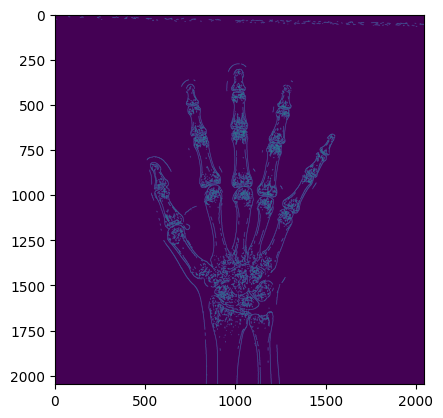

In [110]:


# Lower Threshold (50): 값을 낮추면 더 많은 픽셀이 에지로 간주되며, 노이즈가 포함될 가능성이 커집니다.
# Upper Threshold (150): 값을 높이면 강한 에지만 유지하며, 약한 에지가 사라질 수 있습니다.

# Canny Edge Detection
edges = cv2.Canny(gray, 80, 110)
plt.imshow(edges)

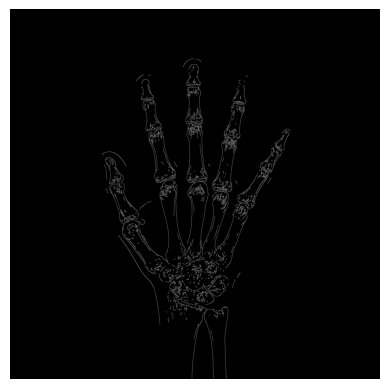

In [111]:
import numpy as np

# Contours 찾기
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# 유효한 contour 필터링
valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 2]

# 원본 이미지 또는 빈 이미지 생성 (이미지와 동일한 크기)
output_image = np.zeros_like(edges)  # edges와 같은 크기의 빈 이미지 생성

# 유효한 Contour를 이미지에 그리기
cv2.drawContours(output_image, valid_contours, -1, (255, 255, 255), 1)  # 흰색으로 Contour 그리기

# Matplotlib로 시각화
plt.imshow(output_image, cmap='gray')
plt.axis('off')  # 축 숨기기
plt.show()

(2048, 2048, 3)
(1823, 1141, 3)
(2048, 2048, 3)


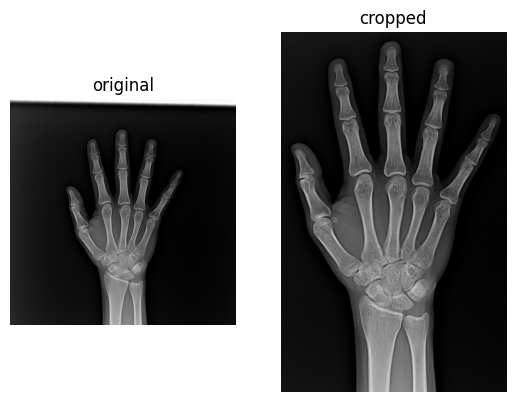

In [112]:
# 모든 Contour를 포함하는 Bounding Box 계산
# if not valid_contours:
#     print("No valid contours found.")
#     image  # 유효한 contour가 없으면 원본 이미지를 반환

x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
# print(valid_contours)
for cnt in valid_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x + w)
    y_max = max(y_max, y + h)

# 패딩 추가 (이미지 경계 고려)
x_min = max(0, x_min - 50)
y_min = max(0, y_min - 50)
x_max = min(image.shape[1], x_max + 50)
y_max = min(image.shape[0], y_max + 50)

# Crop and Zoom
cropped = image[y_min:y_max, x_min:x_max]

padded = np.zeros_like(image)  # 원본 이미지와 동일한 크기의 빈 이미지
padded[y_min:y_max, x_min:x_max] = cropped  # 크롭된 이미지를 패딩된 이미지의 해당 위치에 삽입


# 원본 이미지 표시
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("original")
plt.axis("off")
print(image.shape)

# Zoomed 이미지 표시
plt.subplot(1, 2, 2)
plt.imshow(cropped)
plt.title("cropped")
plt.axis("off")
print(cropped.shape)
print(padded.shape)


plt.show()

원본 이미지 shape =  (2048, 2048, 3)


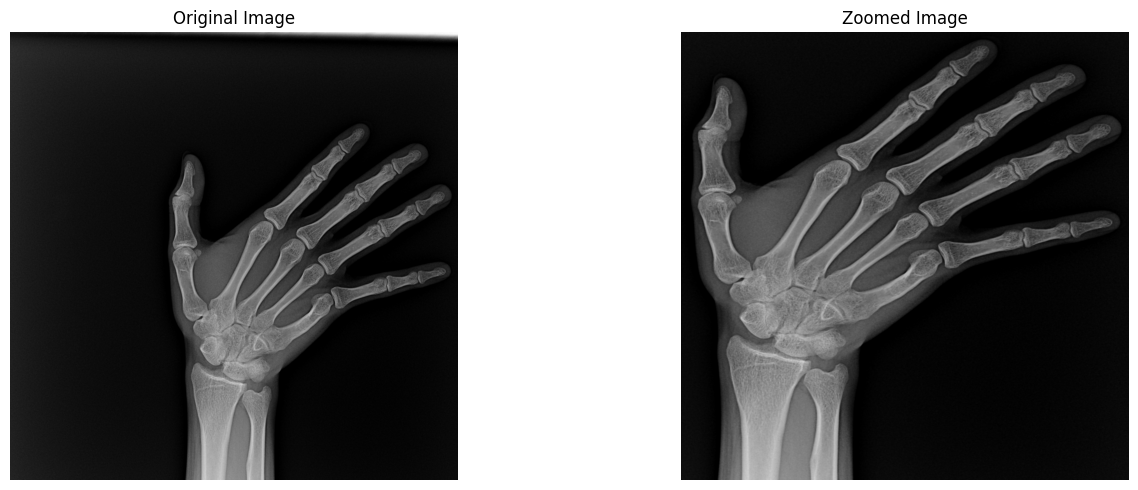

In [ ]:
# 이미지 경로 설정 - ROOT 설정만 바꾸면 됨~
# level2-cv-semanticsegmentation-cv-10-lv3\code\data\train\DCM\ID001\image1661130828152_R.png
IMAGE_ROOT = "../test_data/"
image_path = os.path.join(IMAGE_ROOT, "test_08.png")


# 이미지 출력
image = cv2.imread(image_path)
print("원본 이미지 shape = ", image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Edge 확대 적용
zoomed_image = crop_and_zoom_edges(image)


# 원본, Augmented, Zoomed 비교 시각화
plt.figure(figsize=(15, 5))

# 원본 이미지 표시
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Zoomed 이미지 표시
plt.subplot(1, 2, 2)
plt.imshow(zoomed_image)
plt.title("Zoomed Image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import torch

def transform_with_crop(image, mask, padding=50, min_contour_area=10):
    # Check if image is a tensor, convert to numpy array if needed
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).cpu().numpy()  # CxHxW -> HxWxC 형태로 변환
    if isinstance(mask, torch.Tensor):
        mask = mask.cpu().numpy()  # 마스크는 2D 배열일 가능성이 높음

    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Ensure the image is in uint8 format for Canny
    if gray.dtype != np.uint8:
        gray = (gray * 255).astype(np.uint8)

    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 유효한 contour 필터링
    valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]
    if not valid_contours:
        return image, mask  # 유효한 contour가 없으면 원본 반환

    x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
    for cnt in valid_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        x_min, y_min = min(x_min, x), min(y_min, y)
        x_max, y_max = max(x_max, x + w), max(y_max, y + h)
    
    # 패딩 추가 (경계 고려)
    x_min, y_min = max(0, x_min - padding), max(0, y_min - padding)
    x_max, y_max = min(image.shape[1], x_max + padding), min(image.shape[0], y_max + padding)
    
    # 크롭 적용
    cropped_image = image[y_min:y_max, x_min:x_max]
    cropped_mask = mask[y_min:y_max, x_min:x_max]

    # 크기가 유효한지 확인 후 리사이즈
    if cropped_image.size == 0 or cropped_mask.size == 0:
        return image, mask  # 크롭된 이미지가 비어 있으면 원본 반환

    resized_image = cv2.resize(cropped_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)
    resized_mask = cv2.resize(cropped_mask, (mask.shape[1], mask.shape[0]), interpolation=cv2.INTER_NEAREST)
    return resized_image, resized_mask


# 이미지와 마스크 로드
image_path = "path_to_your_image.png"  # 실제 이미지 경로로 변경
mask_path = "path_to_your_mask.png"  # 실제 마스크 경로로 변경

# 이미지와 마스크를 읽기
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 기본적으로 BGR로 읽으므로 RGB로 변환
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # 마스크는 일반적으로 그레이스케일로 읽음

# 크롭 및 리사이즈 적용
resized_image, resized_mask = transform_with_crop(image, mask, padding=50, min_contour_area=10)

# 시각화
plt.figure(figsize=(10, 5))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# 원본 마스크
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Original Mask")
plt.axis("off")

# 크롭 및 리사이즈된 이미지
plt.subplot(2, 2, 3)
plt.imshow(resized_image)
plt.title("Cropped & Resized Image")
plt.axis("off")

# 크롭 및 리사이즈된 마스크
plt.subplot(2, 2, 4)
plt.imshow(resized_mask, cmap="gray")
plt.title("Cropped & Resized Mask")
plt.axis("off")

plt.tight_layout()
plt.show()
